In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('01TrainVal.csv')
Weekday      = pd.read_csv('00Weekday.csv')
Weekend      = pd.read_csv('00Weekend.csv')

In [3]:
TrainVal['index'] = pd.to_datetime(TrainVal['index'])
TrainVal.rename(columns = {'index':'Timestamp'}, inplace=True)

# Feature Engineering

## Split to Training and Test Data

In [4]:
len(TrainVal)

35136

In [5]:
test_percent = 0.1     # 10 % used as test data
len(TrainVal)*test_percent
test_point = np.round(len(TrainVal)*test_percent)
test_ind = int(len(TrainVal) - test_point)

In [6]:
test_ind

31622

In [7]:
train = TrainVal.iloc[:test_ind]      #From 1st element to 31575
test = TrainVal.iloc[test_ind:]       #From 31575 to end

In [8]:
test

,Timestamp,f1,f2,f3,f4,f5,f6,f7
31622,2019-06-18 19:10:00,268.0,290.0,295.0,217.0,267.0,253.0,213.0
31623,2019-06-18 19:15:00,266.0,304.0,321.0,276.0,347.0,237.0,207.0
31624,2019-06-18 19:20:00,289.0,305.0,328.0,269.0,340.0,223.0,218.0
31625,2019-06-18 19:25:00,271.0,249.0,273.0,235.0,282.0,223.0,206.0
31626,2019-06-18 19:30:00,240.0,246.0,267.0,204.0,253.0,189.0,190.0
...,...,...,...,...,...,...,...,...
35131,2019-06-30 23:35:00,141.0,143.0,150.0,142.0,153.0,110.0,84.0
35132,2019-06-30 23:40:00,132.0,128.0,139.0,116.0,114.0,98.0,89.0
35133,2019-06-30 23:45:00,106.0,111.0,123.0,127.0,146.0,94.0,85.0
35134,2019-06-30 23:50:00,137.0,140.0,141.0,103.0,124.0,109.0,95.0


# Visualizations

In [9]:
# Pearson correlation coefficient
TrainVal.corr()

,f1,f2,f3,f4,f5,f6,f7
f1,1.000000,0.983483,0.982383,0.954577,0.966233,0.935325,0.930477
f2,0.983483,1.000000,0.979585,0.951496,0.963061,0.937823,0.929227
f3,0.982383,0.979585,1.000000,0.962390,0.975561,0.951432,0.944456
f4,0.954577,0.951496,0.962390,1.000000,0.990609,0.944325,0.936848
f5,0.966233,0.963061,0.975561,0.990609,1.000000,0.958261,0.950206
f6,0.935325,0.937823,0.951432,0.944325,0.958261,1.000000,0.984901
f7,0.930477,0.929227,0.944456,0.936848,0.950206,0.984901,1.000000


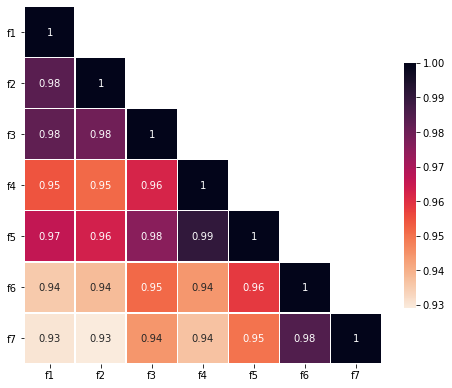

In [10]:
# The above as a plot

corr = TrainVal.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

In [11]:
# Typical week flow data for visualization
typWeek1 = train[(train['Timestamp'].dt.month == 3) & (train['Timestamp'].dt.day >= 4) & (train['Timestamp'].dt.day <= 10)]
typWeek2 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day >= 15) & (train['Timestamp'].dt.day <= 21)]
typWeek3 = train[(train['Timestamp'].dt.month == 5) & (train['Timestamp'].dt.day >= 6) & (train['Timestamp'].dt.day <= 12)]
typWeek4 = test[(test['Timestamp'].dt.month == 6) & (test['Timestamp'].dt.day >= 24) & (test['Timestamp'].dt.day <= 30)]

In [12]:
typWeek1.index = range(len(typWeek1))
typWeek2.index = range(len(typWeek2))
typWeek3.index = range(len(typWeek3))
typWeek4.index = range(len(typWeek4))

In [13]:
typWeek3 # Typical week flow data

,Timestamp,f1,f2,f3,f4,f5,f6,f7
0,2019-05-06 00:00:00,93.0,96.0,96.0,97.0,94.0,53.0,49.0
1,2019-05-06 00:05:00,73.0,79.0,93.0,83.0,84.0,50.0,49.0
2,2019-05-06 00:10:00,68.0,72.0,67.0,77.0,72.0,58.0,60.0
3,2019-05-06 00:15:00,69.0,75.0,88.0,87.0,86.0,64.0,53.0
4,2019-05-06 00:20:00,75.0,79.0,85.0,75.0,70.0,48.0,48.0
...,...,...,...,...,...,...,...,...
2011,2019-05-12 23:35:00,89.0,94.0,101.0,124.0,131.0,62.0,73.0
2012,2019-05-12 23:40:00,121.0,130.0,160.0,116.0,131.0,83.0,84.0
2013,2019-05-12 23:45:00,131.0,118.0,113.0,109.0,110.0,89.0,70.0
2014,2019-05-12 23:50:00,84.0,90.0,86.0,109.0,108.0,76.0,70.0


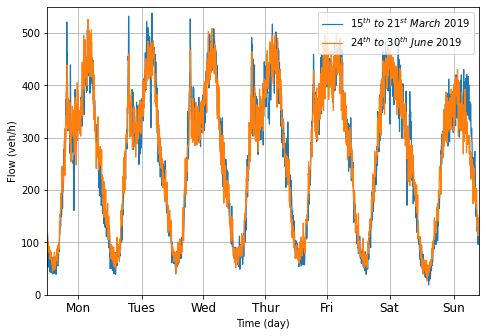

In [14]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# x axis
x = np.linspace(0,2016,2016)

# Plot on that set of axes
axes.plot(x,typWeek2['f5'], lw=1.2, label=r'$15^{th}\ to\ 21^{st}\ March\ 2019$')
axes.plot(x,typWeek4['f5'], lw=1.2, label=r'$24^{th}\ to\ 30^{th}\ June\ 2019$')

axes.set_xlim(0,2020)
axes.set_ylim(0,550)
axes.set_xlabel('Time (day)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144, 442, 730, 1020, 1310, 1600, 1900])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], fontsize = 12)

plt.show()

In [15]:
typday1 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 15)]
typday2 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 16)]
typday3 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 17)]
typday4 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 18)]
typday5 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 19)]

In [16]:
typday6 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 20)]
typday7 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 21)]

In [17]:
typday1.index = range(len(typday1))
typday2.index = range(len(typday2))
typday3.index = range(len(typday3))
typday4.index = range(len(typday4))
typday5.index = range(len(typday5))
typday6.index = range(len(typday6))
typday7.index = range(len(typday7))

In [18]:
typday1

,Timestamp,f1,f2,f3,f4,f5,f6,f7
0,2019-04-15 00:00:00,78.0,83.0,66.0,85.0,84.0,51.0,47.0
1,2019-04-15 00:05:00,93.0,94.0,106.0,106.0,111.0,59.0,58.0
2,2019-04-15 00:10:00,100.0,101.0,96.0,57.0,53.0,63.0,60.0
3,2019-04-15 00:15:00,71.0,76.0,82.0,91.0,88.0,61.0,50.0
4,2019-04-15 00:20:00,67.0,71.0,65.0,74.0,75.0,50.0,46.0
...,...,...,...,...,...,...,...,...
283,2019-04-15 23:35:00,117.0,126.0,137.0,106.0,114.0,73.0,74.0
284,2019-04-15 23:40:00,130.0,138.0,144.0,124.0,138.0,84.0,69.0
285,2019-04-15 23:45:00,127.0,134.0,110.0,112.0,109.0,71.0,68.0
286,2019-04-15 23:50:00,138.0,118.0,145.0,117.0,122.0,83.0,65.0


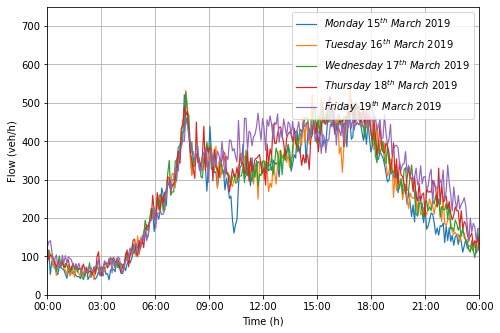

In [19]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,typday1['f5'], lw=1.2, label=r'$Monday\ 15^{th}\ March\ 2019$')
axes.plot(x,typday2['f5'], lw=1.2, label=r'$Tuesday\ 16^{th}\ March\ 2019$')
axes.plot(x,typday3['f5'], lw=1.2, label=r'$Wednesday\ 17^{th}\ March\ 2019$')
axes.plot(x,typday4['f5'], lw=1.2, label=r'$Thursday\ 18^{th}\ March\ 2019$')
axes.plot(x,typday5['f5'], lw=1.2, label=r'$Friday\ 19^{th}\ March\ 2019$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

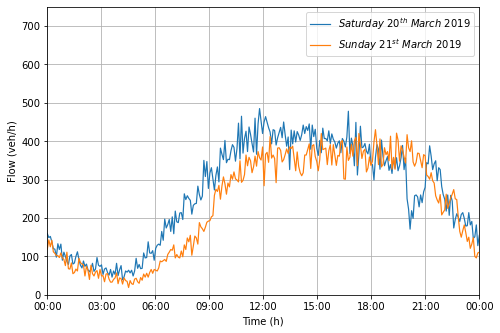

In [20]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,typday6['f5'], lw=1.2, label=r'$Saturday\ 20^{th}\ March\ 2019$')
axes.plot(x,typday7['f5'], lw=1.2, label=r'$Sunday\ 21^{st}\ March\ 2019$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

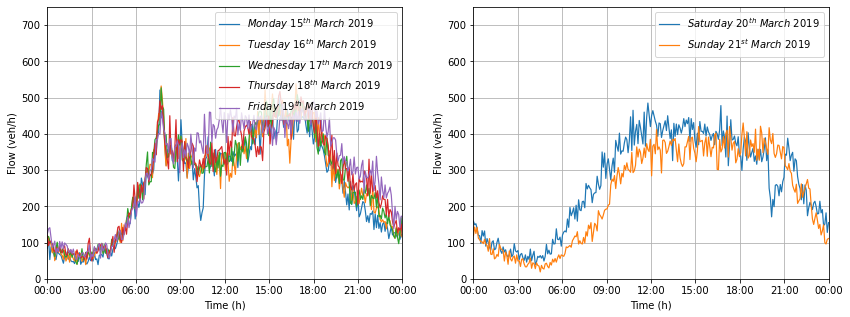

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

axes[0].plot(x,typday1['f5'], lw=1.2, label=r'$Monday\ 15^{th}\ March\ 2019$')
axes[0].plot(x,typday2['f5'], lw=1.2, label=r'$Tuesday\ 16^{th}\ March\ 2019$')
axes[0].plot(x,typday3['f5'], lw=1.2, label=r'$Wednesday\ 17^{th}\ March\ 2019$')
axes[0].plot(x,typday4['f5'], lw=1.2, label=r'$Thursday\ 18^{th}\ March\ 2019$')
axes[0].plot(x,typday5['f5'], lw=1.2, label=r'$Friday\ 19^{th}\ March\ 2019$')

axes[1].plot(x,typday6['f5'], lw=1.2, label=r'$Saturday\ 20^{th}\ March\ 2019$')
axes[1].plot(x,typday7['f5'], lw=1.2, label=r'$Sunday\ 21^{st}\ March\ 2019$')

for i in range(0,2):
    axes[i].set_xlim(0,24)
    axes[i].set_ylim(0,750)
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Flow (veh/5-Min)')

    axes[i].legend(loc=1)
    axes[i].grid()

    axes[i].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
    axes[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])
    
plt.show()

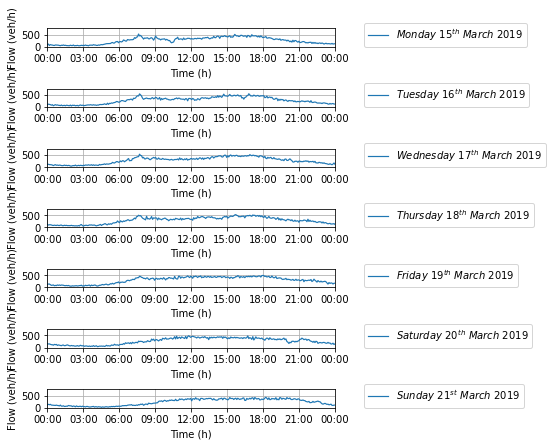

In [22]:
fig,axes = plt.subplots(nrows=7,ncols=1,figsize=(8,6))

axes[0].plot(x,typday1['f5'], lw=1.2, label=r'$Monday\ 15^{th}\ March\ 2019$')
axes[1].plot(x,typday2['f5'], lw=1.2, label=r'$Tuesday\ 16^{th}\ March\ 2019$')
axes[2].plot(x,typday3['f5'], lw=1.2, label=r'$Wednesday\ 17^{th}\ March\ 2019$')
axes[3].plot(x,typday4['f5'], lw=1.2, label=r'$Thursday\ 18^{th}\ March\ 2019$')
axes[4].plot(x,typday5['f5'], lw=1.2, label=r'$Friday\ 19^{th}\ March\ 2019$')

axes[5].plot(x,typday6['f5'], lw=1.2, label=r'$Saturday\ 20^{th}\ March\ 2019$')
axes[6].plot(x,typday7['f5'], lw=1.2, label=r'$Sunday\ 21^{st}\ March\ 2019$')


for i in range(0,7):
    axes[i].set_xlim(0,24)
    axes[i].set_ylim(0,750)
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Flow (veh/5-Min)')

    axes[i].legend(loc=(1.1,0))
    axes[i].grid()

    axes[i].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
    axes[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.tight_layout()
plt.show()

In [23]:
week = pd.DataFrame()

In [24]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week = pd.concat([typday1['f5'],typday2['f5'],typday3['f5'],typday4['f5'],typday5['f5'],typday6['f5'],typday7['f5']], 
                 axis = 1, ignore_index = True)
week.columns = days

In [25]:
week

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,84.0,90.0,111.0,120.0,124.0,159.0,119.0
1,111.0,114.0,117.0,92.0,138.0,149.0,143.0
2,53.0,105.0,103.0,103.0,141.0,152.0,125.0
3,88.0,94.0,99.0,103.0,113.0,138.0,142.0
4,75.0,72.0,96.0,95.0,86.0,120.0,112.0
...,...,...,...,...,...,...,...
283,114.0,118.0,115.0,128.0,186.0,147.0,149.0
284,138.0,133.0,97.0,141.0,177.0,151.0,100.0
285,109.0,138.0,124.0,134.0,141.0,182.0,96.0
286,122.0,118.0,169.0,151.0,173.0,128.0,109.0


<AxesSubplot:>

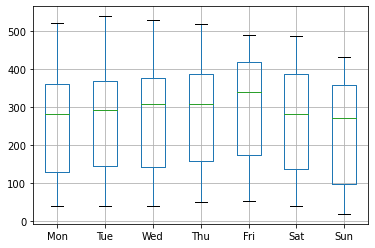

In [26]:
week.boxplot()

#### Heatmap

In [27]:
df = TrainVal.groupby([TrainVal['Timestamp'].dt.weekday,TrainVal['Timestamp'].dt.hour,
                       TrainVal['Timestamp'].dt.minute]).mean()['f5']

In [28]:
df

Timestamp  Timestamp  Timestamp
0          0          0             95.352941
                      5            101.000000
                      10            96.882353
                      15            92.764706
                      20            87.882353
                                      ...    
6          23         35           126.277778
                      40           131.277778
                      45           120.611111
                      50           117.444444
                      55           105.000000
Name: f5, Length: 2016, dtype: float64

In [29]:
df.values

array([ 95.35294118, 101.        ,  96.88235294, ..., 120.61111111,
       117.44444444, 105.        ])

In [30]:
index = []

for x in df.index:
    index.append(x[0])

In [31]:
df1 = pd.DataFrame(data=df.values, index=index, columns=['mean'])

In [32]:
# Pivot the dataframe to desired format

In [33]:
x = 0
y = 0
z = []

for i in df1.index:
    if i == x:
        y+=1
        z.append(y)
    elif i != x:
        x = i
        y = 0
        y+=1
        z.append(y)

In [34]:
df1['day'] = df1.index
df1['Time'] = z

In [35]:
df2 = df1.pivot(index='Time',columns='day',values='mean')

In [36]:
df2.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day')

In [37]:
df2.rename(columns={  
            0  : 'Mon',
            1  : 'Tue',
            2  : 'Wed',
            3  : 'Thu',
            4  : 'Fri',
            5  : 'Sat',
            6  : 'Sun'
                   },  
           inplace=True
          )

In [38]:
df2.T

Time,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
day,,,,,,,,,,,,,,,,,,,,,
Mon,95.352941,101.000000,96.882353,92.764706,87.882353,80.823529,75.294118,73.058824,74.823529,67.411765,...,142.588235,141.117647,131.294118,129.470588,119.176471,122.470588,126.176471,121.235294,118.117647,113.588235
Tue,108.176471,115.588235,114.411765,103.176471,91.000000,86.058824,77.764706,79.352941,80.117647,80.000000,...,150.235294,139.176471,129.000000,122.235294,120.411765,124.588235,127.705882,121.117647,120.411765,109.588235
Wed,102.941176,120.176471,120.882353,110.705882,92.764706,85.352941,78.117647,85.823529,85.705882,82.294118,...,145.058824,139.294118,130.117647,127.588235,119.823529,127.117647,126.529412,129.705882,130.176471,121.647059
Thu,122.235294,112.176471,115.764706,111.941176,99.941176,84.470588,81.705882,81.529412,84.411765,79.941176,...,151.294118,153.058824,138.294118,133.058824,128.764706,133.647059,136.941176,129.294118,125.647059,117.411765
Fri,118.222222,122.777778,120.666667,119.333333,96.833333,91.777778,88.722222,87.388889,91.888889,88.055556,...,202.555556,194.666667,181.500000,173.333333,171.277778,181.055556,170.722222,170.722222,161.944444,152.722222
Sat,148.500000,155.333333,158.333333,141.444444,134.611111,130.388889,120.833333,120.111111,122.722222,120.222222,...,192.111111,189.111111,189.944444,177.444444,175.388889,158.833333,159.944444,158.833333,158.500000,140.833333
Sun,136.305556,144.333333,135.833333,132.944444,124.388889,105.611111,107.388889,107.500000,106.888889,97.888889,...,154.000000,151.222222,143.444444,133.666667,134.111111,126.277778,131.277778,120.611111,117.444444,105.000000


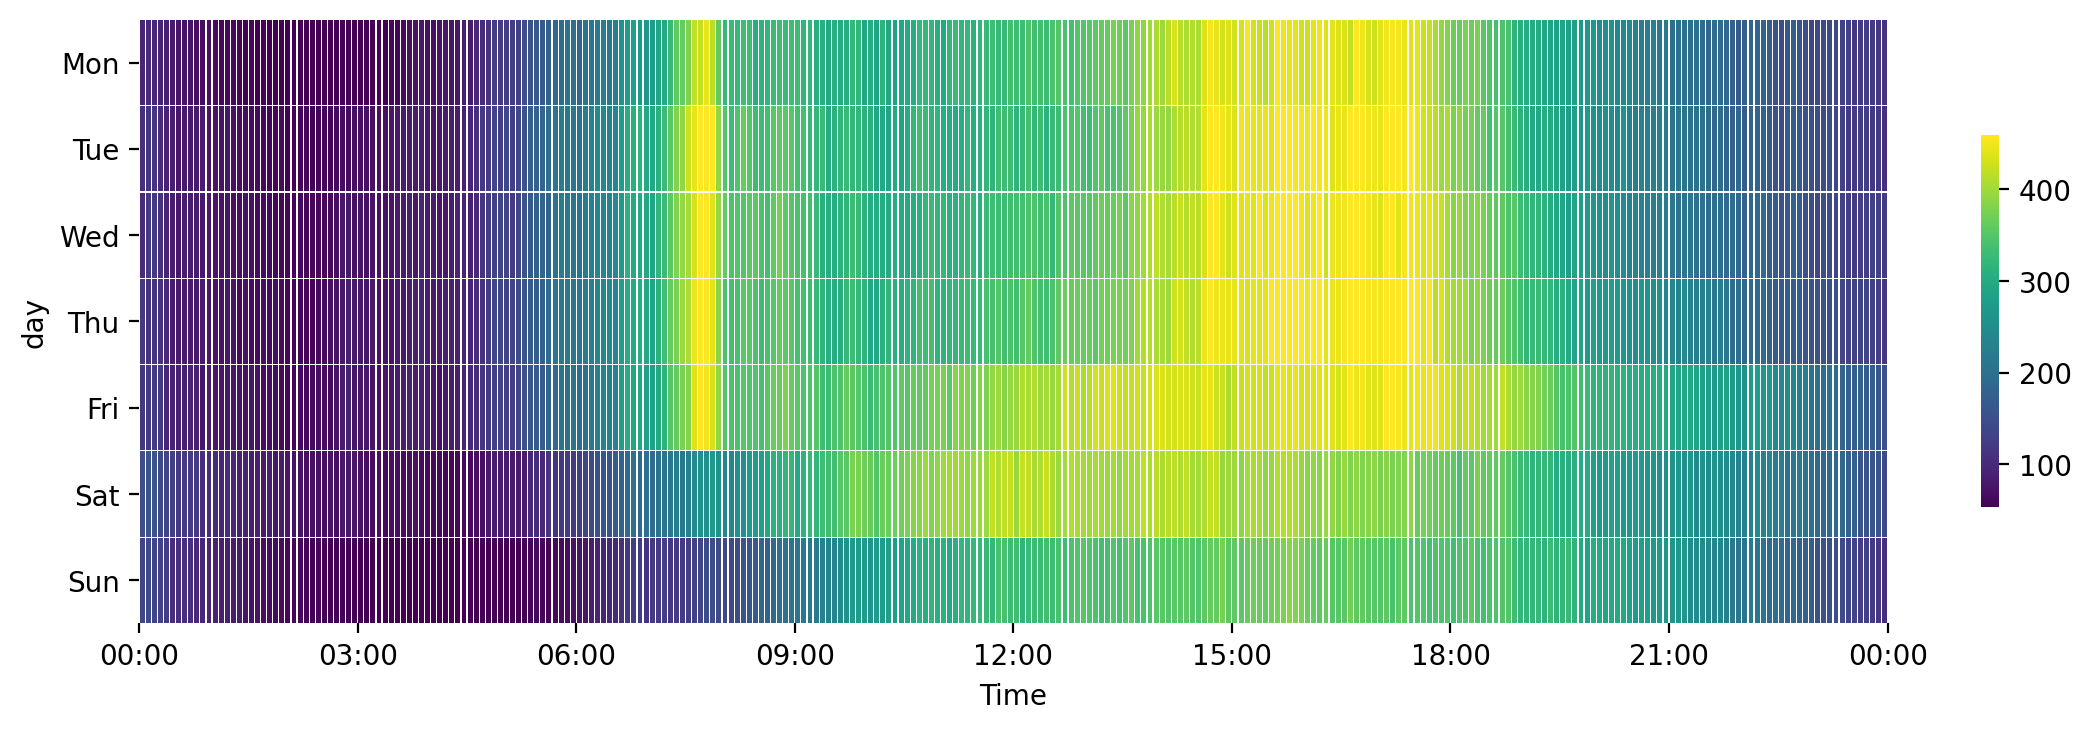

In [39]:
plt.figure(figsize=(12,4), dpi=200)
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                  linewidth=0.05
                 )
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);

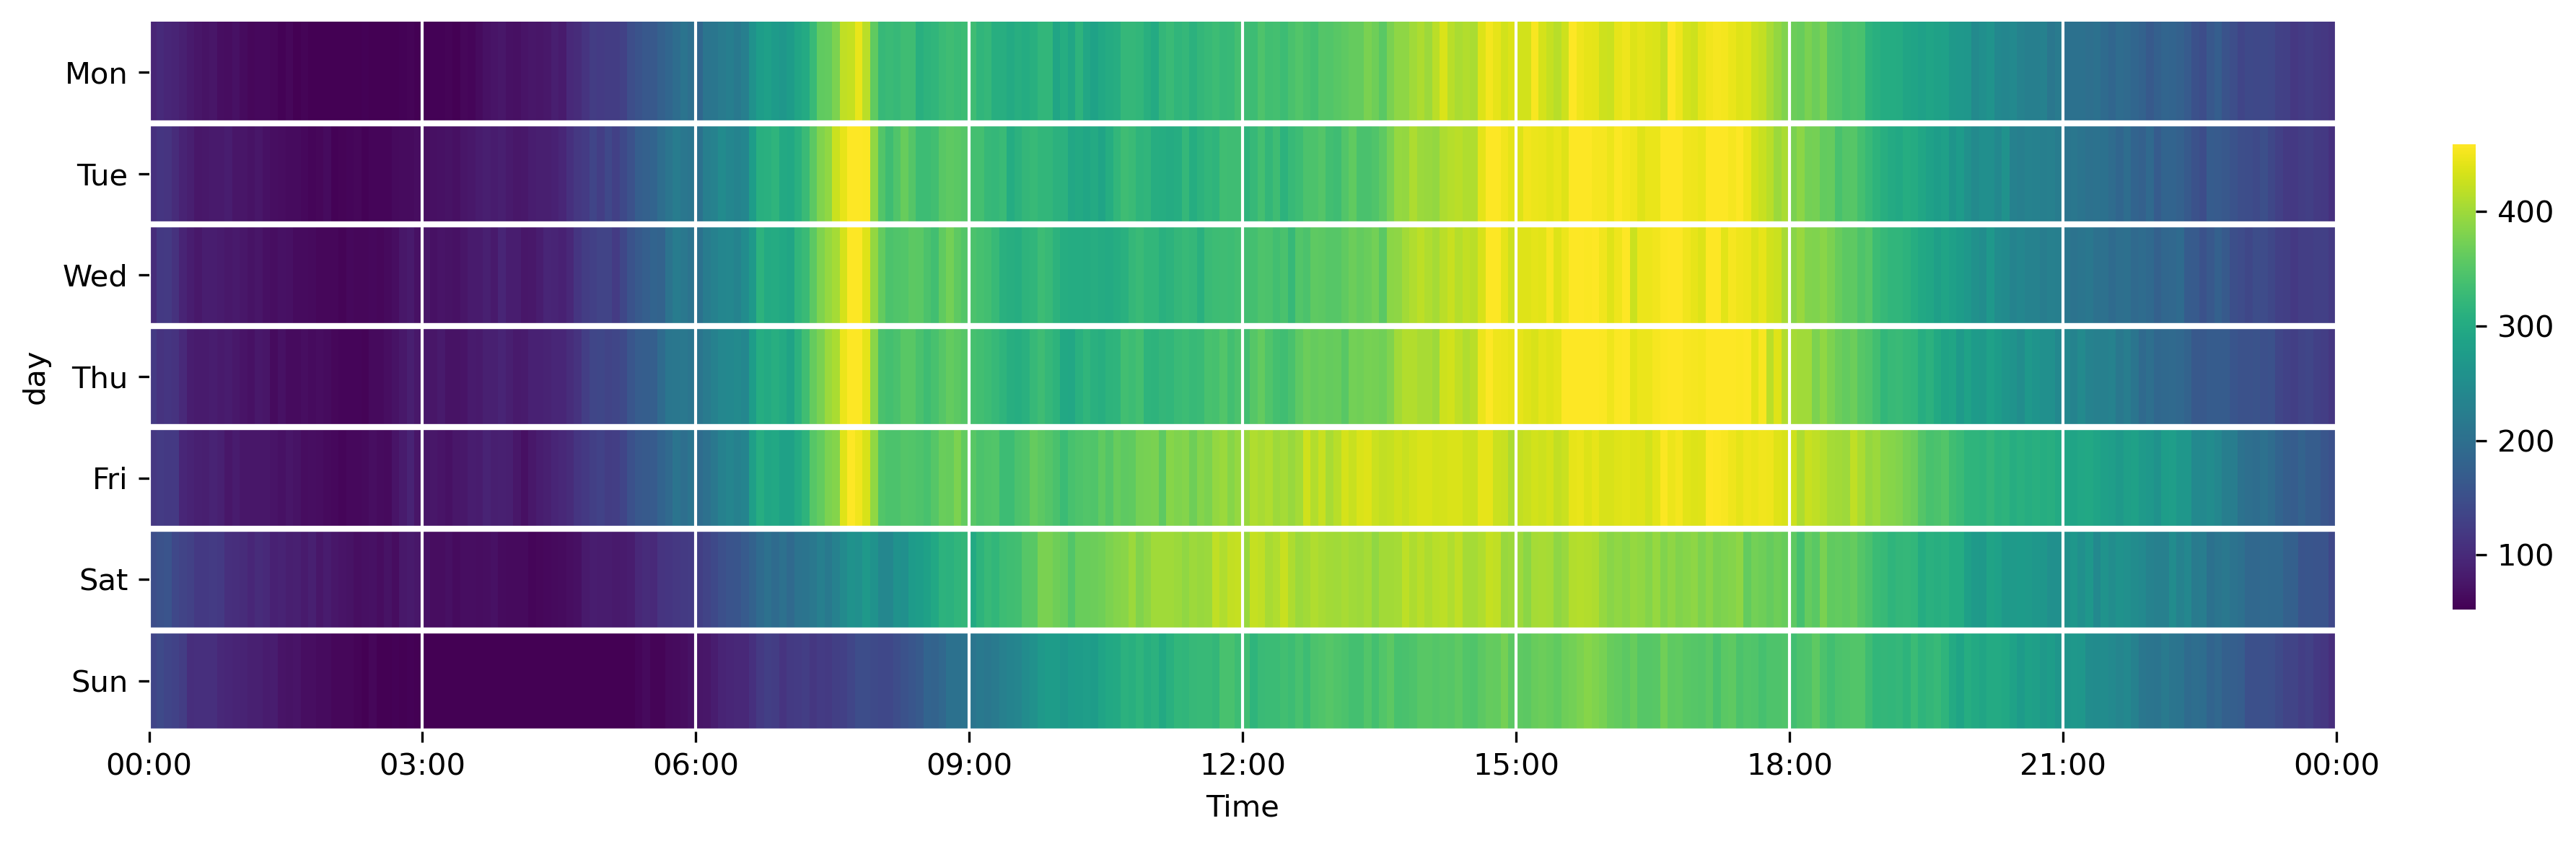

In [40]:
plt.figure(figsize=(12,4), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )


for i in range(1,df2.T.shape[0]+1):
    hmap.axhline(i, color='white', lw=2)
for j in ticks:
    hmap.axvline(j, color='white', lw=1)
    
    
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()